# Primary sample selection and RV matching

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 2000000
from matplotlib.pyplot import figure

## Primary sample selection
In this notebook, we are selecting primary sample with targets similar to Gaia NS1: metal-poor main sequence stars with surface temperature 4000~7000 K. 

In [20]:
df = pd.read_csv("Data/dr9_v2.0_MRS_stellar.csv")

In [21]:
#condition 1: [Fe/H]<-1
#condition 2: logg_lasp > 4.0
#condition 3: 4000 <teff_lasp <7000
df_target = df.loc[(df["feh_lasp"] < -1.0) & (df["feh_lasp"]!= -9999) & (df["teff_lasp"] != -9999) & (df["logg_lasp"] > 4.0) & (df["teff_lasp"]<7000) & (df["teff_lasp"]>4000)]

In [22]:
df_target[["designation", "teff_lasp", "feh_lasp", "logg_lasp"]]

,designation,teff_lasp,feh_lasp,logg_lasp
22,J055949.78+293516.6,6592.90,-1.320,4.265
46,J060000.62+300427.7,6540.68,-2.403,4.073
715,J095004.59+404702.7,5685.01,-1.003,4.383
1199,J225217.42+143242.1,6917.05,-1.189,4.158
1412,J084007.40+133037.2,5377.83,-1.349,4.794
...,...,...,...,...
1696348,J135103.77+401651.4,4151.93,-1.155,4.819
1696568,J023556.95+340401.7,4209.07,-1.038,4.686
1696575,J113232.88+015949.1,4300.71,-1.198,4.641
1696579,J165236.55+675140.1,4243.25,-1.099,4.814


In [23]:
df_target.drop_duplicates(subset = ["designation"])

,mobsid,obsid,uid,gp_id,designation,obsdate,lmjd,mjd,planid,spid,...,ca_fe,ti_fe,cr_fe,ni_fe,cu_fe,alpha_m_lasp,alpha_m_lasp_err,moon_angle,lunardate,moon_flg
22,597009026B,597009026,G16602599074485,3431715844882683392,J055949.78+293516.6,2017-11-02,58060,58059,HIP2811701,9,...,0.04434,-9999.00000,-9999.00000,0.01680,-9999.00000,-9999.000000,-9999.000000,68.0,14,0
46,597009072B,597009072,G16107839732520,3449757829962271104,J060000.62+300427.7,2017-11-02,58060,58059,HIP2811701,9,...,-0.01931,-9999.00000,-9999.00000,0.01888,-9999.00000,-9999.000000,-9999.000000,68.0,14,0
715,654402093B,654402093,L16406969987652,654402093,J095004.59+404702.7,2018-03-08,58186,58185,HIP4901901,2,...,0.12733,-9999.00000,-9999.00000,0.01945,-9999.00000,0.353014,0.019071,106.9,21,0
1199,684616161B,684616161,G13466613930418,2828261772875303424,J225217.42+143242.1,2018-10-29,58421,58420,NT225624N130316M01,16,...,0.21340,-9999.00000,-9999.00000,-0.03869,-9999.00000,-9999.000000,-9999.000000,106.9,21,0
1412,634916091B,634916091,G16346295308846,603173906992717696,J084007.40+133037.2,2018-01-25,58144,58143,HIP4312101,16,...,0.17757,-9999.00000,-9999.00000,0.01776,-9999.00000,-9999.000000,-9999.000000,85.0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695754,903213144R,903213144,G14318480930851,4542531070666264960,J173108.34+135954.3,2021-04-18,59323,59322,NT172337N132351M01,13,...,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.00000,-9999.000000,-9999.000000,135.4,7,0
1696199,909805221R,909805221,G15173995058368,1497300164314524544,J135009.31+404751.7,2021-06-02,59368,59367,NT135320N421105M01,5,...,0.15470,-0.17329,0.00271,0.00622,0.16466,-9999.000000,-9999.000000,133.1,22,0
1696202,824114142R,824114142,G15149132644813,1471296989195419264,J134408.13+352426.0,2020-05-31,59001,59000,NT135147N342639M01,14,...,0.04764,-0.20644,0.05153,-0.01794,0.16298,-9999.000000,-9999.000000,38.3,9,0
1696224,913302246R,913302246,G14808810831654,1649549298894189312,J162700.83+684430.7,2021-05-01,59336,59335,TD164021N701415T01,2,...,0.06948,-0.16659,-0.07723,-0.01975,0.09280,-9999.000000,-9999.000000,99.3,20,0


(3000.0, 8700.0)

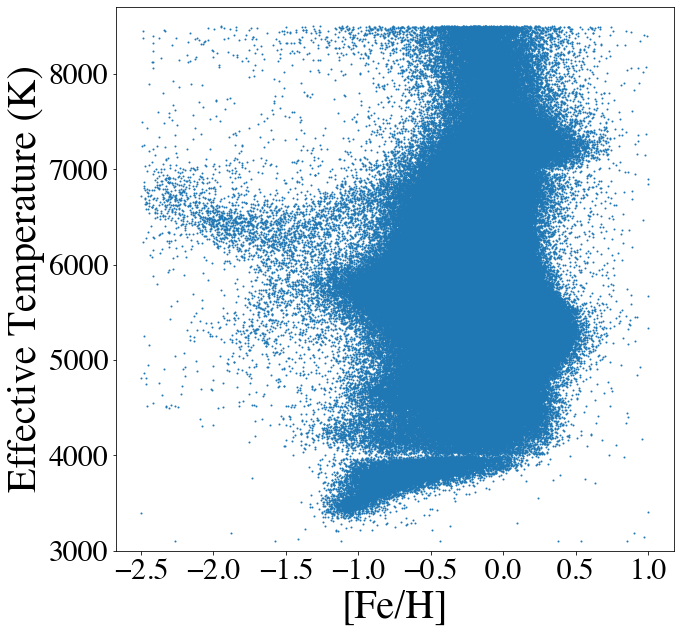

In [24]:
#plot the distribution of main sequence stars according to temperature and metallicity
plt.rcParams.update({'font.family':'times'})
fig= figure(figsize=(10,10))

df_plot = df.loc[(df["feh_lasp"]!= -9999) & (df["teff_lasp"] != -9999) & (df["logg_lasp"] >4.0)]
x = np.array(df_plot['feh_lasp'])
y = np.array(df_plot['teff_lasp'])
plt.scatter(x, y, s = 1)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('[Fe/H]', fontsize = 40)
plt.ylabel('Effective Temperature (K)', fontsize = 40)
plt.ylim(3000, 8700)

In [ ]:
#construct a txt file for objects search in LAMOST MRS
desig_list = df_target['designation'].tolist()
desig_list = list_without_headings = [item.replace('LAMOST ', "", 1) for item in desig_list]
file1 = open('Data/MRS_Sample_to_search', 'w')
for item in desig_list:
        file1.write(f"{item}\n")
file1.close()

df_sample = df_target[df_target['designation'].isin(desig_list)]

## RV matching
In the spectral analysis, we need RV for each target to localize H-alpha line

In [26]:
#construct a designation and radial velocity table for selected targets
df1 = df_target[['designation', 'rv_br1']]
df1['designation'] = df1['designation'].apply(lambda x: 'LAMOST ' + x)
df1.to_csv('Data/target_LAMOST_RV.csv')

/var/folders/69/qyn6t8gs2d72s601sh3t50sc0000gn/T/ipykernel_1343/967037621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['designation'] = df1['designation'].apply(lambda x: 'LAMOST ' + x)


In [27]:
df_desig_gaia = df_sample[['Designation', 'gaia_source_id']].drop_duplicates()
Gaia_ID_list = df_desig_gaia['gaia_source_id']
Gaia_ID_list.to_list()

KeyError: "['Designation'] not in index"

In [ ]:
file1 = open('/Users/mac/Desktop/cassi/Gaia_ID', 'w')
for item in Gaia_ID_list:
        # Write each item followed by a newline character
        file1.write(f"Gaia DR3 {item}\n")
file1.close()

(array([ 3.,  5.,  5.,  4.,  7.,  9.,  9., 17., 21., 21.]),
 array([-2.268 , -2.1421, -2.0162, -1.8903, -1.7644, -1.6385, -1.5126,
        -1.3867, -1.2608, -1.1349, -1.009 ]),
 <BarContainer object of 10 artists>)

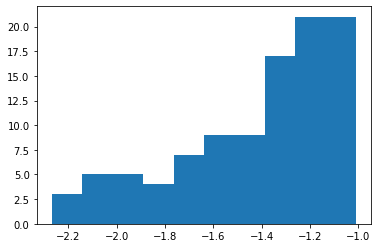

In [ ]:
#plot the distribution of metallicity
plt.hist(np.array(df_sample['feh_lasp']))

(array([25., 11., 22., 16., 11.,  2.,  6.,  3.,  2.,  3.]),
 array([4.002 , 4.0608, 4.1196, 4.1784, 4.2372, 4.296 , 4.3548, 4.4136,
        4.4724, 4.5312, 4.59  ]),
 <BarContainer object of 10 artists>)

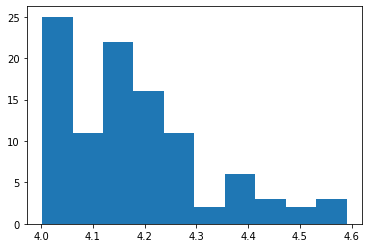

In [ ]:
#plot the distribution of surface gravity
plt.hist(np.array(df_sample['logg_lasp']))

(array([ 2.,  0.,  1.,  1.,  3., 16., 28., 24., 20.,  6.]),
 array([4223.73 , 4490.995, 4758.26 , 5025.525, 5292.79 , 5560.055,
        5827.32 , 6094.585, 6361.85 , 6629.115, 6896.38 ]),
 <BarContainer object of 10 artists>)

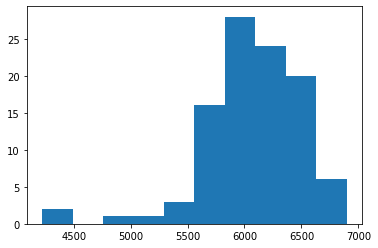

In [ ]:
#plot the distribution of surface effective temperature
plt.hist(np.array(df_sample['teff_lasp']))